In [1]:
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord

new_record = []
for seq_record in SeqIO.parse('/home/ouconstand/data/Virus_Host/seq_data/sequence_0.fasta','fasta'):
    seq = seq_record.seq
    if len(seq) > 2000:
        for i in range(0, len(seq), 500):
            if i + 2000 > len(seq):
                new_seq = seq[-2000:]
                rec = SeqRecord(new_seq, id=seq_record.id, description=seq_record.description, name=seq_record.name)
                new_record.append(rec)
                break

            new_seq = seq[i:i+2000]
            rec = SeqRecord(new_seq,id=seq_record.id,description=seq_record.description,name=seq_record.name)
            new_record.append(rec)

    else:
        print('sequence length is less than 2000 ' + seq_record.name)

sequence length is less than 2000 MT221943.1
sequence length is less than 2000 MG000871.1
sequence length is less than 2000 KX286039.1
sequence length is less than 2000 MT222095.1
sequence length is less than 2000 KJ690965.1
sequence length is less than 2000 MG591491.1
sequence length is less than 2000 MT221904.1
sequence length is less than 2000 KX425844.1
sequence length is less than 2000 MT221761.1
sequence length is less than 2000 MT221744.1
sequence length is less than 2000 MT221762.1
sequence length is less than 2000 MF769465.1
sequence length is less than 2000 MT221870.1
sequence length is less than 2000 MF769474.1
sequence length is less than 2000 MG963196.1
sequence length is less than 2000 MG762664.1


In [2]:
import numpy as np

nucl_dict = dict([(value, key) for key, value in enumerate(['A', 'T', 'C', 'G'])])

def nucl_to_int(sequences, dim=4):
    results = np.zeros((len(sequences),dim))
    sequences = [nucl_dict.get(seq) for seq in sequences]
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [3]:
train_data = np.asarray([nucl_to_int(seq.seq) for seq in new_record])
# train_data = train_data.reshape(223, 2000*4)

In [4]:
from keras.utils.np_utils import to_categorical

labels_dict = dict([(value, key) for key, value in enumerate(['KT368856.1', 'KT368895.1', 'MT726043.1', 'MZ519413.1'])])
labels_list = [labels_dict.get(seq.id) for seq in new_record]
train_labels = to_categorical(labels_list)

/home/ouconstand/software/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Conv1D(filters=64, kernel_size=4, padding='same', activation='relu', input_shape=(2000, 4)))
model.add(layers.Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(layers.MaxPool1D(pool_size=2))

model.add(layers.Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
model.add(layers.Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
model.add(layers.MaxPool1D(pool_size=2))

model.add(layers.Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
model.add(layers.Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
model.add(layers.MaxPool1D(pool_size=2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [10]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 2000, 64)          1088      
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 2000, 64)          16448     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1000, 64)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 1000, 128)         32896     
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 1000, 128)         65664     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 500, 128)          0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 500, 128)         

In [11]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
history = model.fit(train_data, train_labels, epochs=20)

Epoch 1/20
7/7 [==============================] - 5s 671ms/step - loss: 0.7612 - accuracy: 0.7399
Epoch 2/20
7/7 [==============================] - 4s 601ms/step - loss: 0.6002 - accuracy: 0.7265
Epoch 3/20
7/7 [==============================] - 4s 603ms/step - loss: 0.1408 - accuracy: 0.9686
Epoch 4/20
7/7 [==============================] - 4s 605ms/step - loss: 0.0211 - accuracy: 0.9955
Epoch 5/20
7/7 [==============================] - 5s 646ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 6/20
7/7 [==============================] - 4s 616ms/step - loss: 6.1052e-04 - accuracy: 1.0000
Epoch 7/20
7/7 [==============================] - 4s 612ms/step - loss: 3.2153e-04 - accuracy: 1.0000
Epoch 8/20
7/7 [==============================] - 4s 616ms/step - loss: 1.7873e-04 - accuracy: 1.0000
Epoch 9/20
7/7 [==============================] - 5s 719ms/step - loss: 8.9764e-05 - accuracy: 1.0000
Epoch 10/20
7/7 [==============================] - 4s 605ms/step - loss: 4.7502e-05 - accuracy: 1.0000

In [32]:
np.argmax(model.predict(train_data[0:1]))

3

In [18]:
train_data[0]

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [35]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

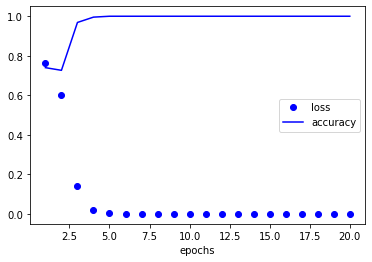

In [39]:
import matplotlib.pyplot as plt

loss_value = history_dict['loss']
accuracy_value = history_dict['accuracy']

epochs = range(1, len(loss_value) + 1)

plt.plot(epochs, loss_value, 'bo', label='loss')
plt.plot(epochs, accuracy_value, 'b', label='accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [38]:
accuracy_value

[0.7399103045463562,
 0.726457417011261,
 0.9686098694801331,
 0.9955157041549683,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]